In [27]:
import numpy as np
import rewardpredictive as rp
import rlutils as rl
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font', **{'family': 'serif', 'size': 9})
rc('text', usetex=True)

ql = rp.ExperimentSetTaskSequenceRandomRewardChangeQLearning.load()
qt = rp.ExperimentSetTaskSequenceRandomRewardChangeQTransfer.load()
sfl = rp.ExperimentSetTaskSequenceRandomRewardChangeSFLearning.load()
sft = rp.ExperimentSetTaskSequenceRandomRewardChangeSFTransfer.load()
sfta = rp.ExperimentSetTaskSequenceRandomRewardChangeSFTransferAll.load()

Loading mazes from file /home/taodav/Documents/rewardpredictive/data/RandomRewardMaze/maze.pkl
Loading mazes from file /home/taodav/Documents/rewardpredictive/data/RandomRewardMaze/maze.pkl
Loading mazes from file /home/taodav/Documents/rewardpredictive/data/RandomRewardMaze/maze.pkl
Loading mazes from file /home/taodav/Documents/rewardpredictive/data/RandomRewardMaze/maze.pkl
Loading mazes from file /home/taodav/Documents/rewardpredictive/data/RandomRewardMaze/maze.pkl
Loading mazes from file /home/taodav/Documents/rewardpredictive/data/RandomRewardMaze/maze.pkl
Loading mazes from file /home/taodav/Documents/rewardpredictive/data/RandomRewardMaze/maze.pkl
Loading mazes from file /home/taodav/Documents/rewardpredictive/data/RandomRewardMaze/maze.pkl
Loading mazes from file /home/taodav/Documents/rewardpredictive/data/RandomRewardMaze/maze.pkl
Loading mazes from file /home/taodav/Documents/rewardpredictive/data/RandomRewardMaze/maze.pkl
Loading mazes from file /home/taodav/Documents/rew

In [28]:
# Set up some preliminary variables used for plotting
episodes_per_task = ql.experiment_list[0].hparam["episodes"]
runs_per_task = ql.experiment_list[0].hparam["repeats"]
ql.experiment_list[0]
num_tasks = ql.experiment_list[0].hparam["num_tasks"]
tasks = np.arange(num_tasks)

Q-learning
repeats: 10
task_sequence: significant
exploration: egreedy
episodes: 100
epsilon: 0.1
gamma: 0.9
mdp_size: 8
num_tasks: 20
lr: 0.7
Q-learning with Q-value transfer
repeats: 10
task_sequence: significant
exploration: egreedy
episodes: 100
epsilon: 0.1
gamma: 0.9
mdp_size: 8
num_tasks: 20
lr: 0.9
SF-transfer
repeats: 10
task_sequence: significant
exploration: egreedy
episodes: 100
epsilon: 0.1
gamma: 0.9
mdp_size: 8
num_tasks: 20
lr_sf: 0.1
lr_r: 0.5
SF-learning
repeats: 10
task_sequence: significant
exploration: egreedy
episodes: 100
epsilon: 0.1
gamma: 0.9
mdp_size: 8
num_tasks: 20
lr_sf: 0.5
lr_r: 0.3
SF-learning with SF and rew transfer
repeats: 10
task_sequence: significant
exploration: egreedy
episodes: 100
epsilon: 0.1
gamma: 0.9
mdp_size: 8
num_tasks: 20
lr_sf: 0.1
lr_r: 0.9


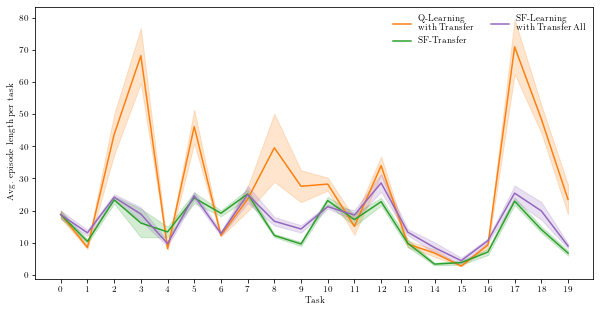

In [29]:
print('Q-learning')
exp_ql = ql.get_best_experiment(exploration='egreedy', task_sequence='significant') 
print('Q-learning with Q-value transfer')
exp_qt = qt.get_best_experiment(exploration='egreedy', task_sequence='significant')  
print('SF-transfer')
exp_sft = sft.get_best_experiment(exploration='egreedy', task_sequence='significant')  
print('SF-learning')
exp_sfl = sfl.get_best_experiment(exploration='egreedy', task_sequence='significant')  
print('SF-learning with SF and rew transfer')
exp_sfta = sfta.get_best_experiment(exploration='egreedy', task_sequence='significant')  

ep_len_qlearning = np.mean(exp_ql.results['episode_length'], axis=-1)
ep_len_qtransfer = np.mean(exp_qt.results['episode_length'], axis=-1)
ep_len_sftransfer = np.mean(exp_sft.results['episode_length'], axis=-1)
ep_len_sflearning = np.mean(exp_sfl.results['episode_length'], axis=-1)
ep_len_sftransferall = np.mean(exp_sfta.results['episode_length'], axis=-1)

plt.figure(figsize=(10, 5))
# rl.plot.mean_with_sem(tasks, ep_len_qlearning, axis=0, color='C0', label='Q-Learning')
rl.plot.mean_with_sem(tasks, ep_len_qtransfer, axis=0, color='C1', label='Q-Learning\nwith Transfer')
rl.plot.mean_with_sem(tasks, ep_len_sftransfer, axis=0, color='C2', label='SF-Transfer')
# rl.plot.mean_with_sem(tasks, ep_len_sflearning, axis=0, color='C3', label='SF-Learning')
rl.plot.mean_with_sem(tasks, ep_len_sftransferall, axis=0, color='C4', label='SF-Learning\nwith Transfer All')
# plt.ylim([10, 35])
plt.ylabel('Avg. episode length per task')
plt.xlabel('Task')
plt.xticks(tasks)
leg = plt.legend(loc=1, ncol=2, frameon=False)
leg.get_frame().set_linewidth(0.0)
plt.savefig('figure/sftransfer/comparison_ep_len_per_task.pdf', bbox_inches='tight', pad_inches=.1, transparent=True)

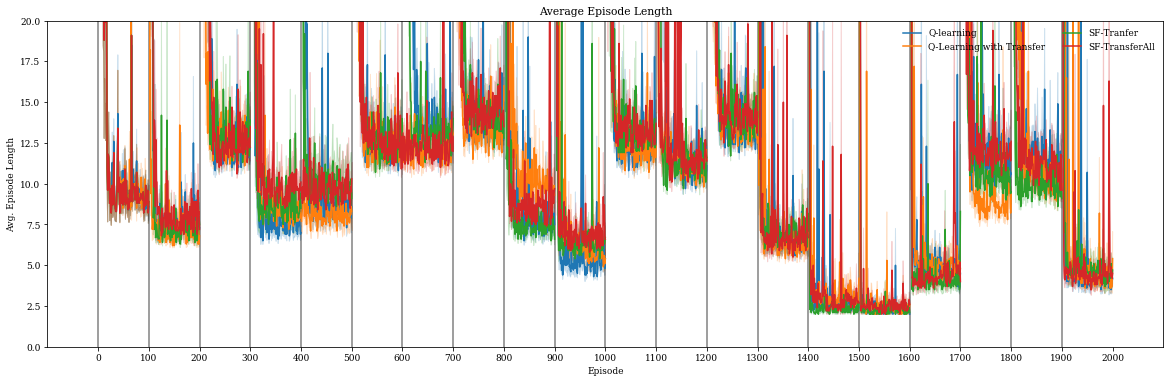

In [22]:
plt.figure(figsize=(20, 6))
for i in [episodes_per_task * task for task in tasks]:
    plt.plot([i, i], [0, 1000], c='k', alpha=0.5)
ep_len_ql = np.array(exp_ql.results['episode_length']).transpose([1, 0, 2])
ep_len_qt = np.array(exp_qt.results['episode_length']).transpose([1, 0, 2])
# ep_len_sfl = np.array(exp_sfl.results['episode_length']).transpose([1, 0, 2])
ep_len_sft = np.array(exp_sft.results['episode_length']).transpose([1, 0, 2])
ep_len_sfta = np.array(exp_sfta.results['episode_length']).transpose([1, 0, 2])
ep_idx = np.arange(100) + 1
# exp_names = ["Q-learning", "Q-Learning with Transfer", "SF-Learning", "SF-Tranfer", "SF-TransferAll"]
# for j, ep in enumerate([ep_len_ql, ep_len_qt, ep_len_sfl, ep_len_sft, ep_len_sfta]):
exp_names = ["Q-learning", "Q-Learning with Transfer", "SF-Tranfer", "SF-TransferAll"]
for j, ep in enumerate([ep_len_ql, ep_len_qt, ep_len_sft, ep_len_sfta]):
    for i, ep_len in enumerate(ep):
        rl.plot.mean_with_sem(ep_idx + i * 100, ep_len, axis=0, color=f'C{j}', label=exp_names[j] if i == 0 else "")

plt.xticks([0] + list(np.arange(episodes_per_task, (episodes_per_task * num_tasks + 1), episodes_per_task)))
plt.xlabel('Episode')
plt.ylabel('Avg. Episode Length')
plt.ylim([0, 20])
plt.title("Average Episode Length")
leg = plt.legend(loc=1, ncol=2, frameon=False)
leg.get_frame().set_linewidth(0.0)
plt.savefig('figure/sftransfer/sf_transfer_ep_len.pdf', bbox_inches='tight', pad_inches=.1, transparent=True)

In [23]:
{
    "Q-Learning": ep_len_qlearning.mean(),
    "Q-Transfer": ep_len_qtransfer.mean(),
    "SF-Transfer": ep_len_sftransfer.mean(),
    "SF-Learning": ep_len_sflearning.mean(),
    "SF-TransferAll": ep_len_sftransferall.mean()
}

{'Q-Learning': 16.768,
 'Q-Transfer': 27.25215,
 'SF-Transfer': 15.16415,
 'SF-Learning': 16.3634,
 'SF-TransferAll': 16.8878}